Data  = https://www.kaggle.com/datasets/venky73/spam-mails-dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# converting text into vectorize form of sparse matrix.


In [ ]:
text = ['Hello my name is chirag', 'my surname is Patel' , 'this is my python notebook']

In [ ]:
text

['Hello my name is chirag',
 'my surname is Patel',
 'this is my python notebook']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
vectorizer


CountVectorizer()

In [ ]:
a = vectorizer.fit_transform(text)

In [ ]:
b = a.toarray()

In [ ]:
vectorizer.get_feature_names_out()

array(['chirag', 'hello', 'is', 'my', 'name', 'notebook', 'patel',
       'python', 'surname', 'this'], dtype=object)

In [ ]:
df = pd.DataFrame(data = b, columns = vectorizer.get_feature_names_out())


In [ ]:
df

,chirag,hello,is,my,name,notebook,patel,python,surname,this
0,1,1,1,1,1,0,0,0,0,0
1,0,0,1,1,0,0,1,0,1,0
2,0,0,1,1,0,1,0,1,0,1


In [ ]:
text_1 = ['Hello my name is Chirag Patel', 'this is my python notebook', 'i am trying to create big database', 'features of count vectorizer']
text_1

['Hello my name is Chirag Patel',
 'this is my python notebook',
 'i am trying to create big database',
 'features of count vectorizer']

In [ ]:
count_vect = CountVectorizer(stop_words = [ 'my', 'to'])
count_matrix = count_vect.fit_transform(text_1)


In [ ]:
count_array = count_matrix.toarray()
count_array

array([[0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0],
       [1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]])

In [ ]:
df = pd.DataFrame(data=count_array,columns = count_vect.get_feature_names_out())
df

,am,big,chirag,count,create,database,features,hello,is,name,notebook,of,patel,python,this,trying,vectorizer
0,0,0,1,0,0,0,0,1,1,1,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0
2,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1


In [ ]:
# new data for Experiment
df = pd.read_csv('/content/spam_ham_dataset.csv')
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [ ]:
df.shape

(5171, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [ ]:
df.drop(columns = ['Unnamed: 0', 'label_num'], inplace = True )

In [ ]:
df.shape

(5171, 2)

In [ ]:
df.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [ ]:
df.label.value_counts()


ham     3672
spam    1499
Name: label, dtype: int64

In [ ]:
d1 = {'ham' : 0, 'spam' : 1}

df['label_num'] = df.label.map({'ham' : 0, 'spam' : 1})

In [ ]:
df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df.tail()

,label,text,label_num
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0
5170,spam,Subject: important online banking alert\r\ndea...,1


<Axes: xlabel='label_num', ylabel='count'>

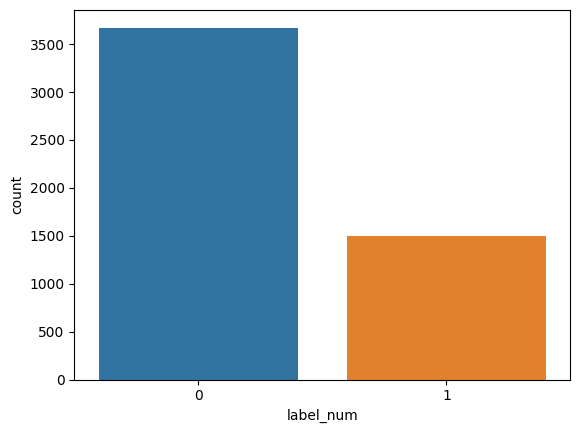

In [ ]:
sns.countplot(data = df, x ='label_num')

In [ ]:
#dependent and independent variable

In [ ]:
X = df['text']
y = df['label_num']

In [ ]:
vectorizer = CountVectorizer()
a_matrix = vectorizer.fit_transform(df['text'])
a_array = a_matrix.toarray()

In [ ]:
df['text_remove'] = df['text'].str.replace('Subject:', '')

In [ ]:
X = df['text_remove']

In [ ]:
df.shape

(5171, 4)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4136,), (1035,), (4136,), (1035,))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
X_train_count = count_vector.fit_transform(X_train.values)
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()

In [ ]:
nb_model

MultinomialNB()

In [ ]:
nb_model.fit(X_train_count, y_train)

MultinomialNB()

In [ ]:
X_test_count = count_vector.transform(X_test.values)
y_pred = nb_model.predict(X_test_count)

In [ ]:
y_pred

array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
 from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay




0.9748792270531401

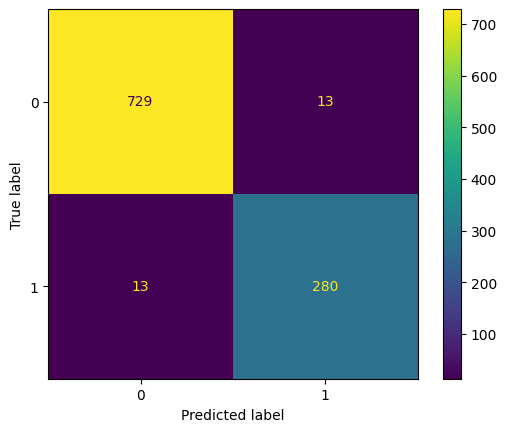

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=nb_model.classes_)
disp.plot()

In [ ]:
 from sklearn.metrics import precision_score,recall_score,f1_score,classification_report,RocCurveDisplay

In [ ]:
accuracy_score(y_test, y_pred)

0.9748792270531401

In [ ]:
precision_score(y_test, y_pred)

0.9556313993174061

In [ ]:
recall_score(y_test, y_pred)

0.9556313993174061

In [ ]:
f1_score(y_test, y_pred)

0.9556313993174061

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       742
           1       0.96      0.96      0.96       293

    accuracy                           0.97      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035



In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(y_test, y_pred)
print("AUC score:",auc)

AUC score: 0.9690555918419914


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [ ]:
fpr

array([0.        , 0.01752022, 1.        ])

In [ ]:
tpr

array([0.       , 0.9556314, 1.       ])

In [ ]:
from sklearn import metrics
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.9690555918419914

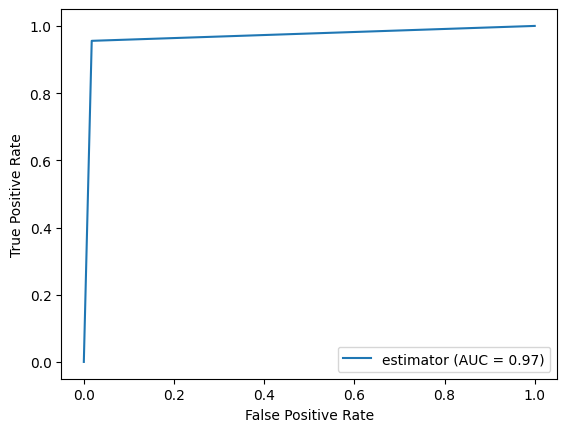

In [ ]:
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='estimator')
display.plot()
plt.show()

Above result of AUC -Estimator shows that the we have very good Accuracy of 9 detecting of spam email

In [ ]:
df[df['label'] == 'spam']

,label,text,label_num,text_remove
3,spam,"Subject: photoshop , windows , office . cheap ...",1,"photoshop , windows , office . cheap . main t..."
7,spam,Subject: looking for medication ? we ` re the ...,1,looking for medication ? we ` re the best sou...
10,spam,Subject: vocable % rnd - word asceticism\r\nvc...,1,vocable % rnd - word asceticism\r\nvcsc - bra...
11,spam,Subject: report 01405 !\r\nwffur attion brom e...,1,report 01405 !\r\nwffur attion brom est inst ...
13,spam,Subject: vic . odin n ^ ow\r\nberne hotbox car...,1,vic . odin n ^ ow\r\nberne hotbox carnal brid...
...,...,...,...,...
5159,spam,Subject: pictures\r\nstreamlined denizen ajar ...,1,pictures\r\nstreamlined denizen ajar chased\r...
5161,spam,Subject: penny stocks are about timing\r\nnoma...,1,penny stocks are about timing\r\nnomad intern...
5162,spam,Subject: anomaly boys from 3881\r\nuosda apapr...,1,anomaly boys from 3881\r\nuosda apaproved mle...
5164,spam,Subject: slutty milf wants to meet you\r\ntake...,1,slutty milf wants to meet you\r\ntake that !\...
